# Introduction

This notebook presents an analysis of the Bank Marketing dataset, which contains information on client interactions during a marketing campaign by a Portuguese bank. The primary objective is to understand the factors influencing whether a client subscribes to a term deposit.

The analysis includes:

• Exploratory Data Analysis (EDA): To uncover patterns and anomalies in the data.

• Data Preparation: Addressing missing values and outliers to ensure data quality.

• Dimensionality Reduction: Applying PCA and t-SNE to identify underlying structures.

• Feature Examination: Investigating how different features relate to client subscription behavior.

# EDA

In [ ]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
url = 'https://static.cdn.epam.com/uploads/583f9e4a37492715074c531dbd5abad2/ds/data.%20module%201.%20EDA.zip'

response = requests.get(url)

zip_file = zipfile.ZipFile(io.BytesIO(response.content))

data = pd.read_csv(zip_file.open('data. module 1. EDA/bank-additional-full.csv'), sep=';')


# Univariate analysis

In [ ]:
data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no null values according to this information. Further investigation is required.

In [ ]:
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                      'euribor3m', 'nr.employed']

Summarizing key statistics for numerical features using `.describe()`.

In [ ]:
data[numerical_features].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Takeaways:

Age: Most clients are middle-aged.

Duration: Calls are either very short or very long. Not sure why there are such long calls, need investigate further.

Campaign: Most clients are contacted a few times, but not sure why some way too many.

Pdays: Most clients weren’t contacted before. Special value 999 means clients not previously contacted.

Previous: Mostly new clients, no prior contacts.

Economics: Employment rate, prices, confidence, and interest rates might affect decisions.

Histograms are plotted to observe the distribution and identify any skewness or outliers in numerical features.

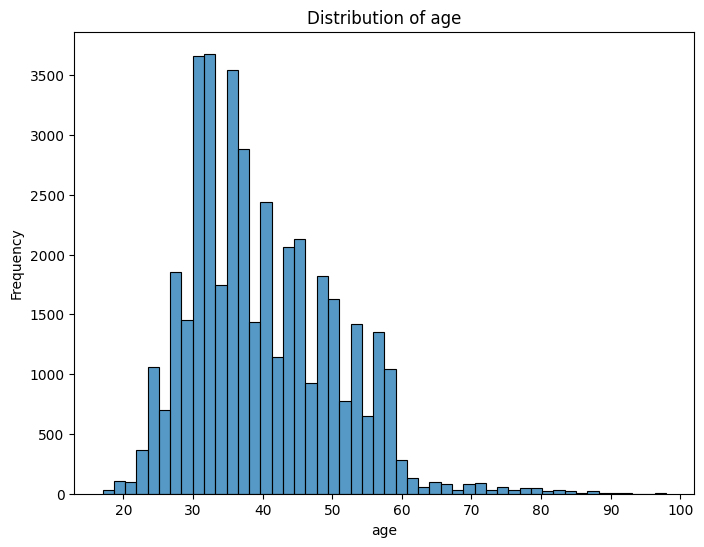

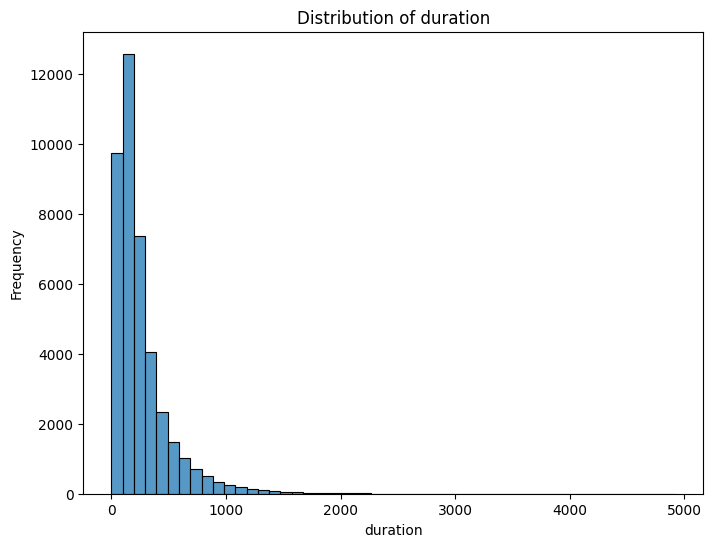

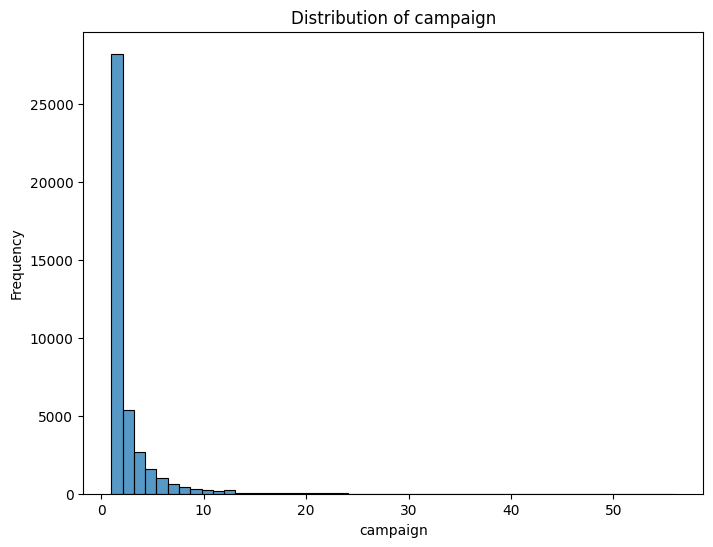

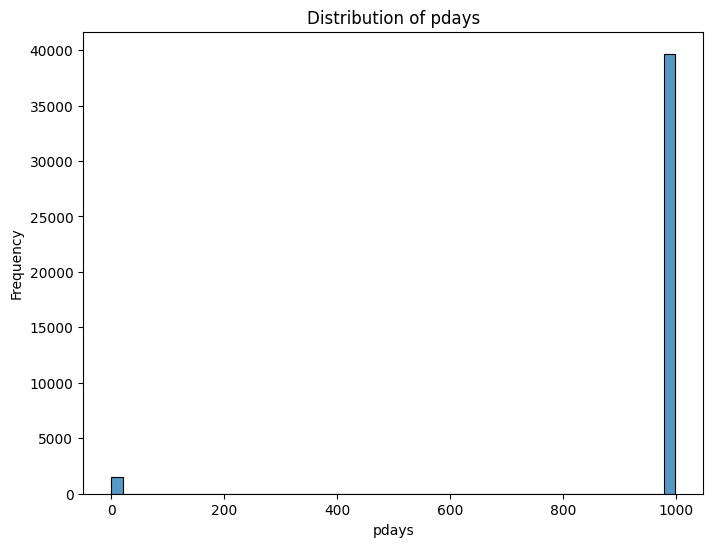

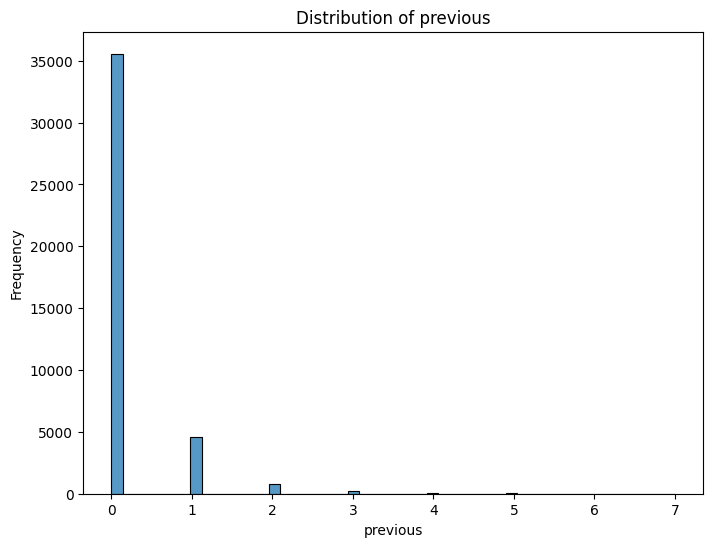

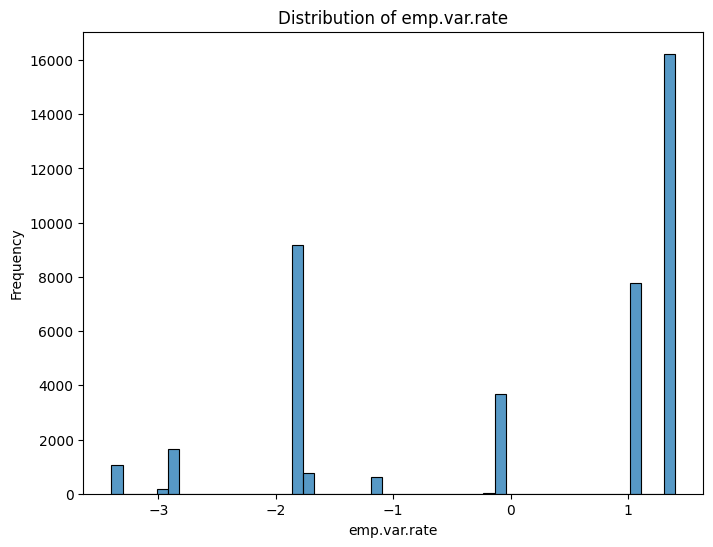

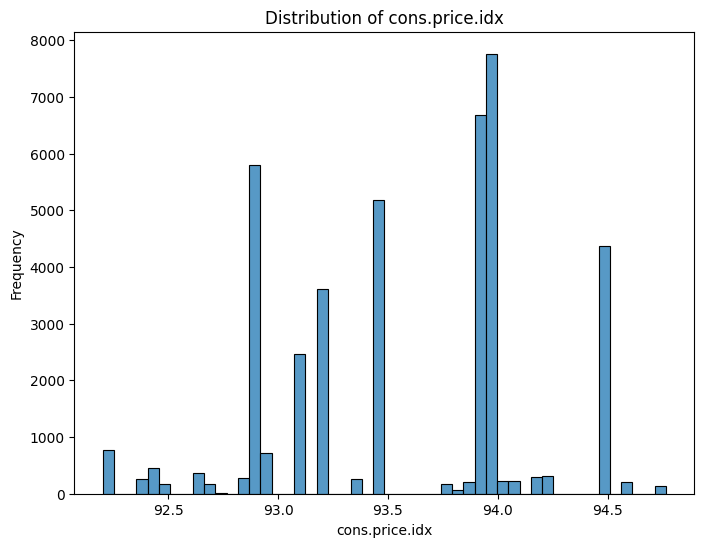

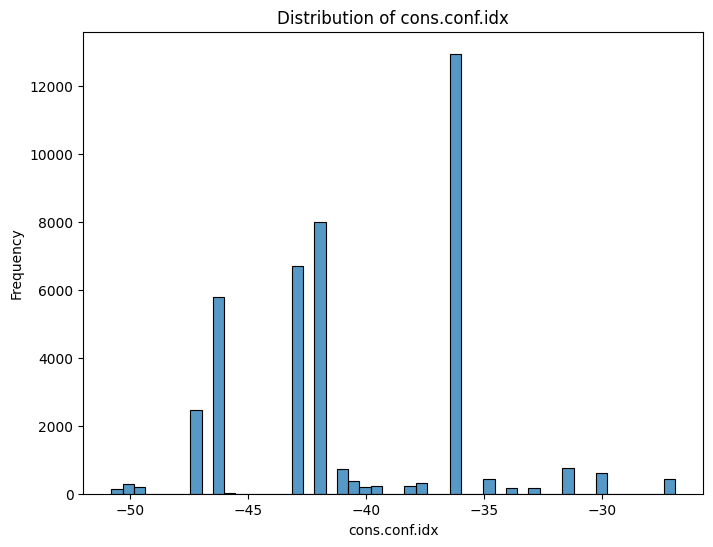

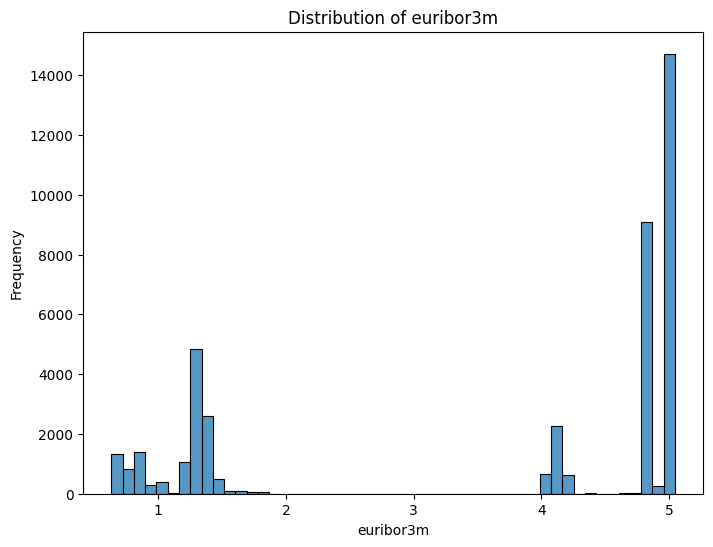

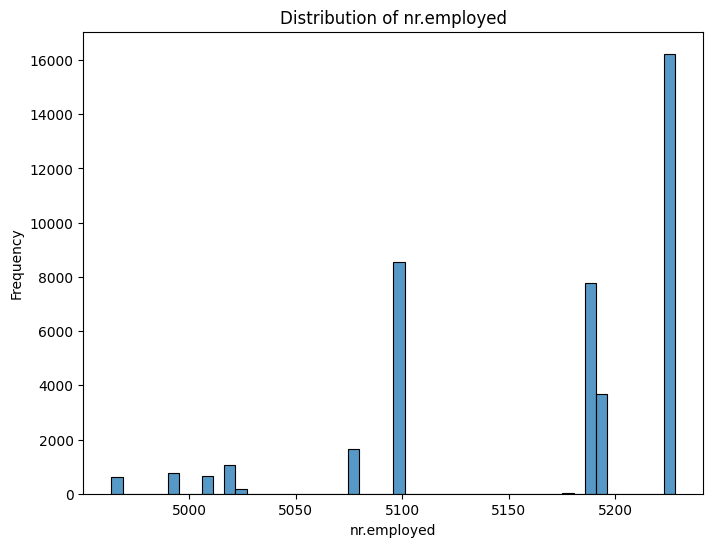

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=50, kde=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Takeaways:

There are anomalies in data that we can see from long tails in the histograms of duration and campaign:

• There are rare long calls up to 5,000 seconds.

• Some customers have been contacted more than 10 times, which seems like an anomaly.

Drawing box plots to identify potential outliers in duration and campaign features.








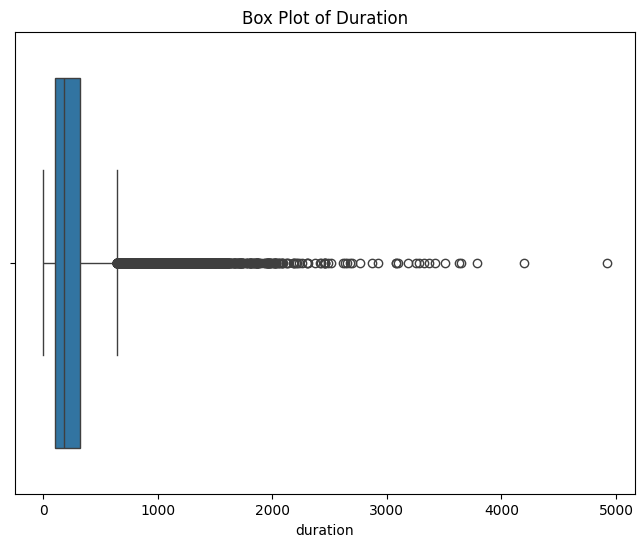

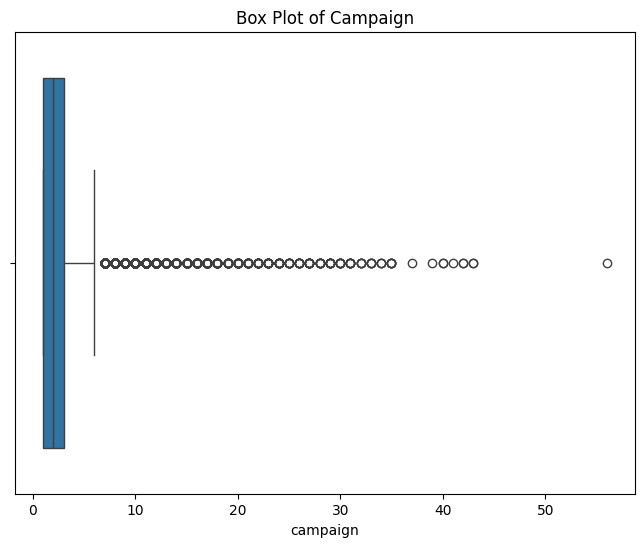

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='duration', data=data)
plt.title('Box Plot of Duration')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='campaign', data=data)
plt.title('Box Plot of Campaign')
plt.show()

In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'day_of_week', 'poutcome', 'y']

Bar charts are plotted to explore the distribution and detect anomalies in categorical features.


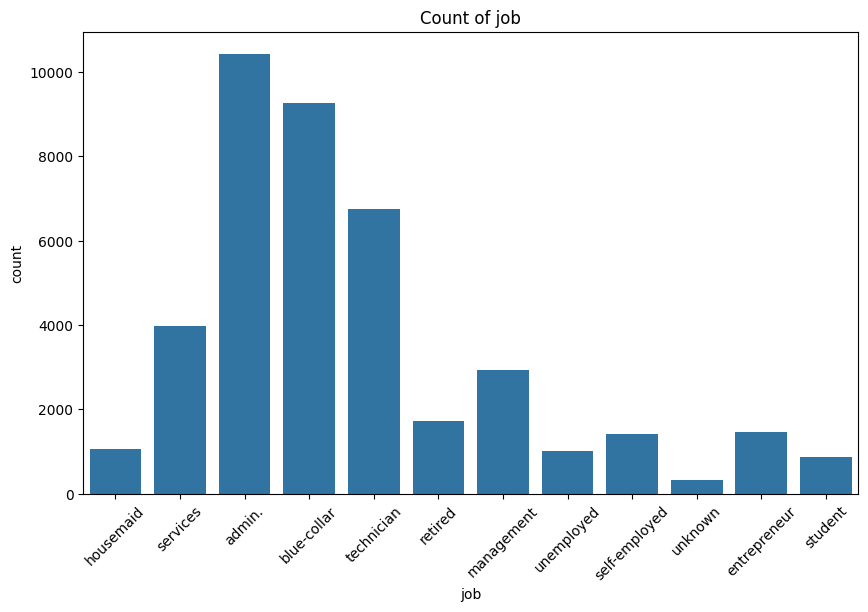

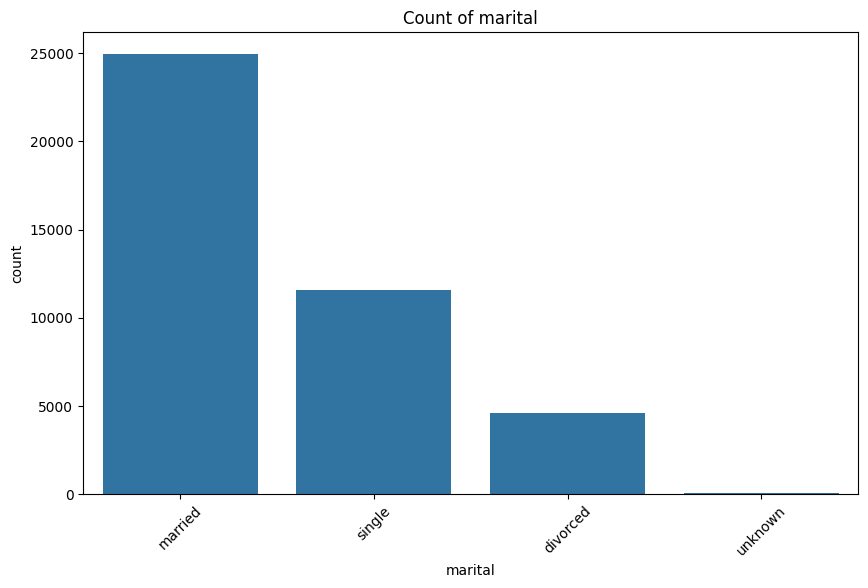

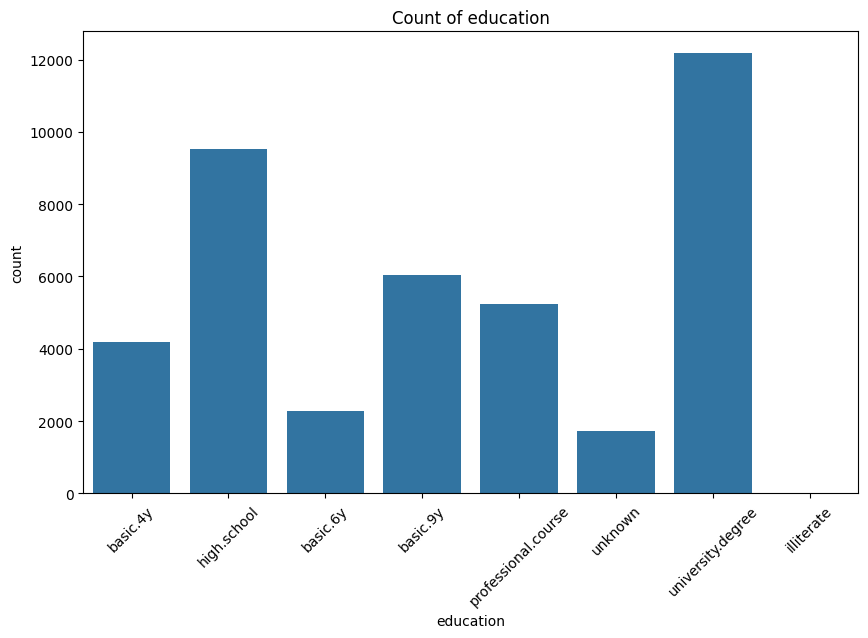

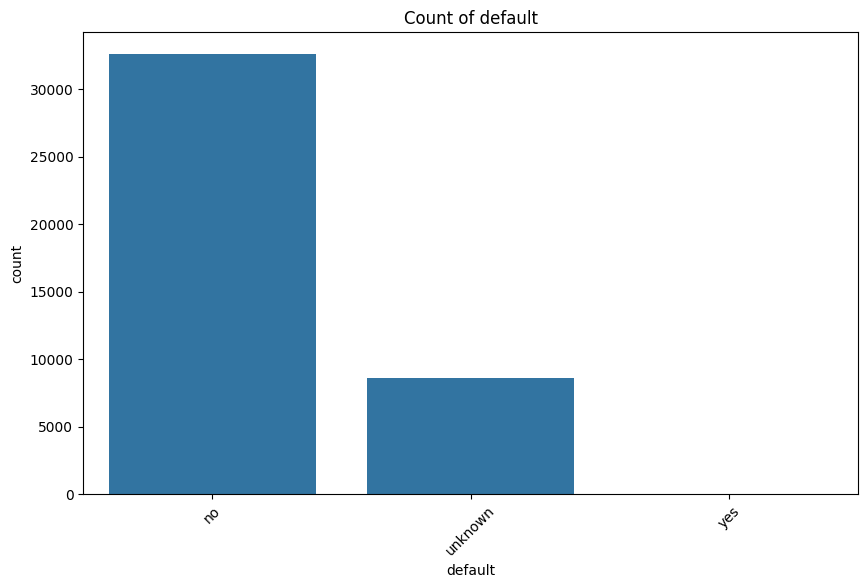

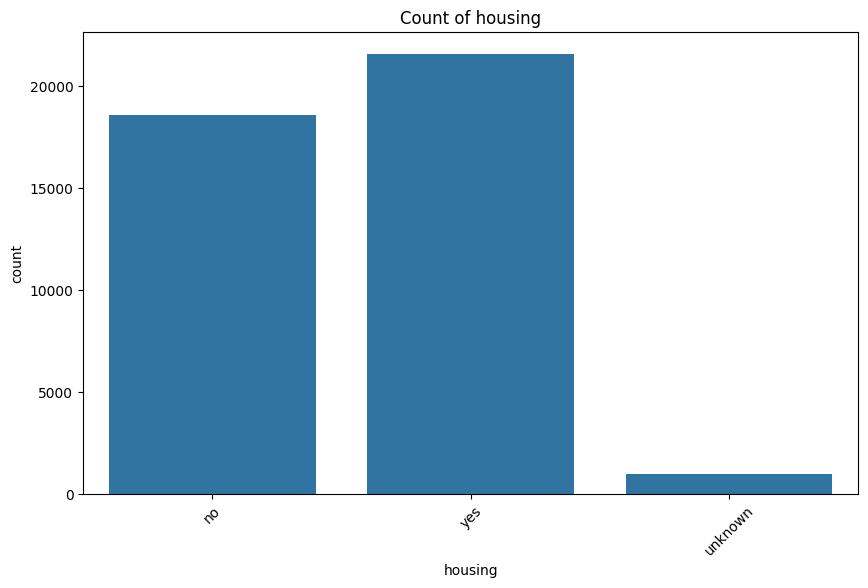

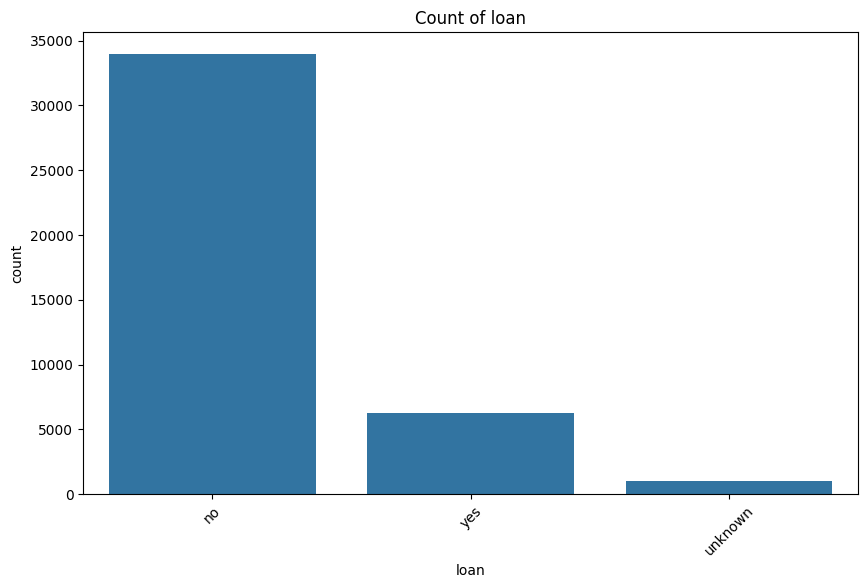

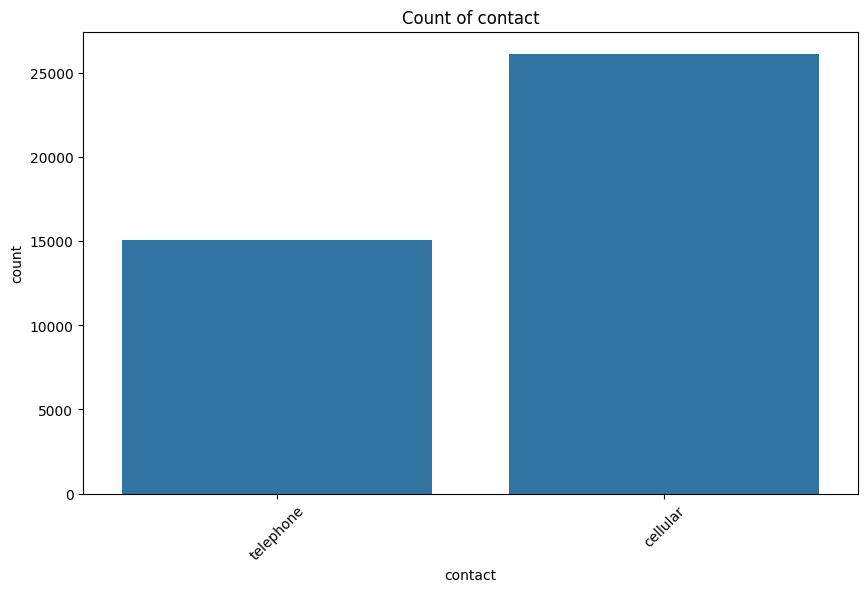

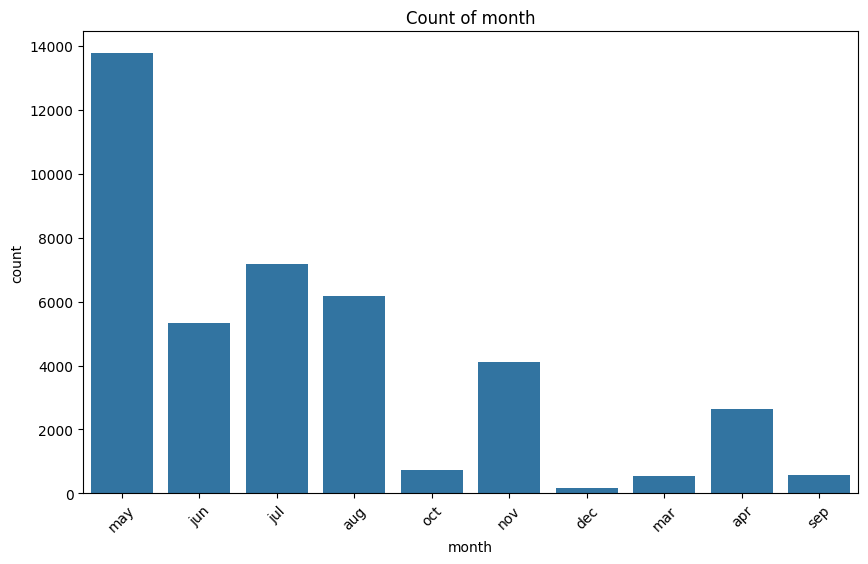

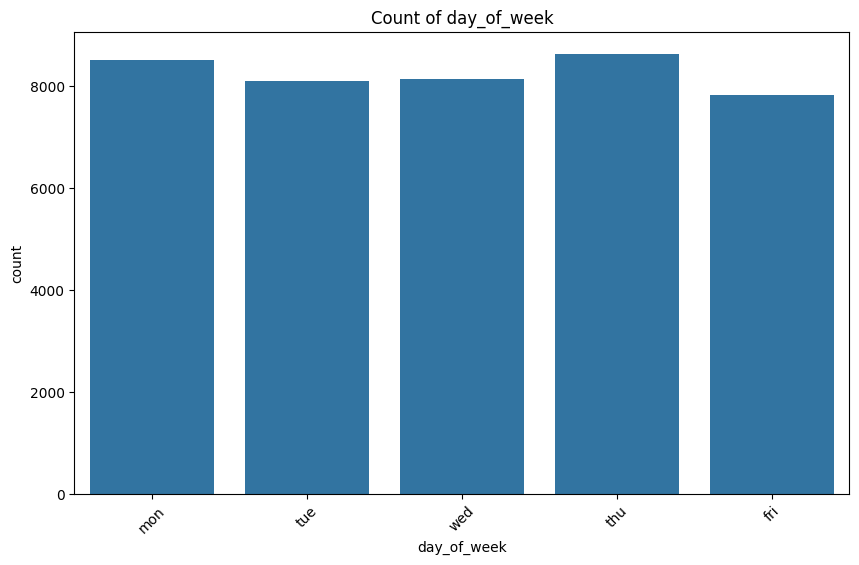

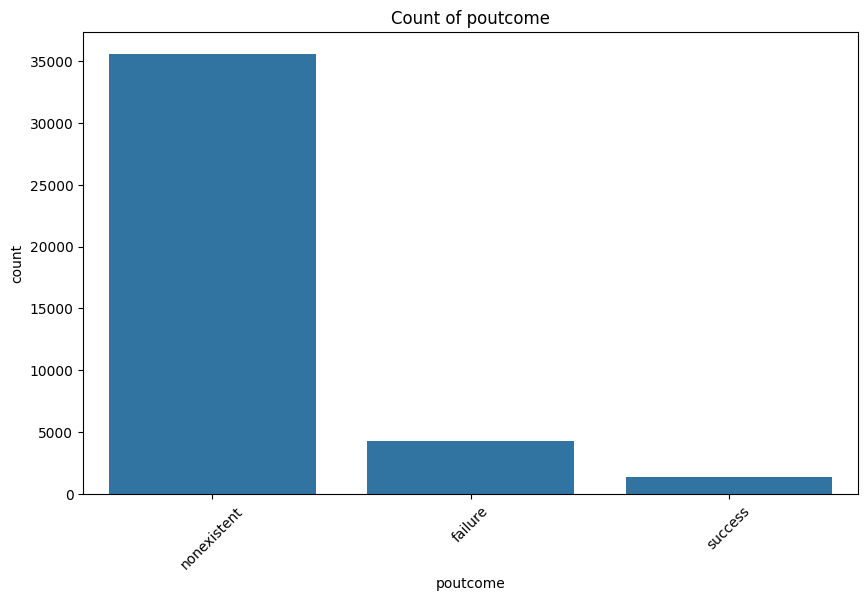

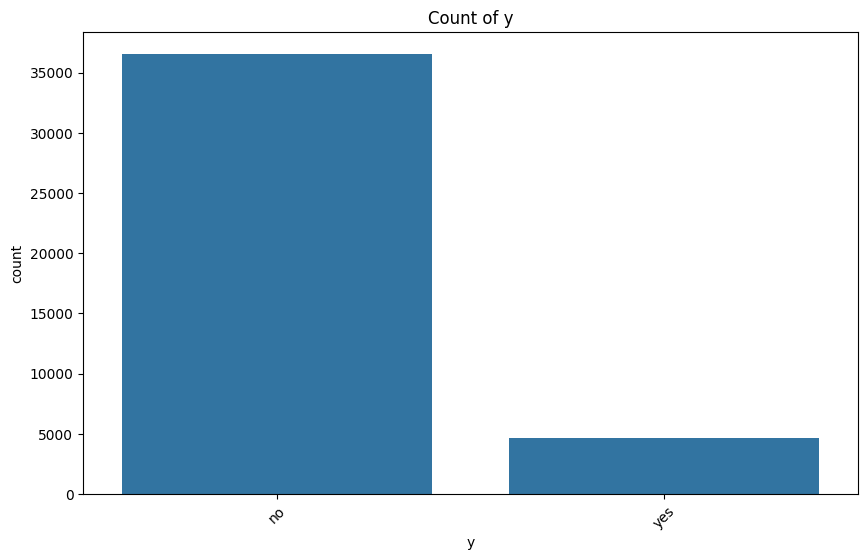

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

From bar plots we can see there are "unknown" values in the data. So, we’ll count how many "unknown" values are in each column and what percent they make up. We should handle missing values in DP step.

In [ ]:
total_rows = data.shape[0]

missing_values = {}

for column in data.columns:
    missing = data[column][data[column] == 'unknown'].count()
    if missing > 0:
        percent = (missing / total_rows) * 100
        missing_values[column] = (missing, percent)

for column, (count, percent) in missing_values.items():
    print(f"{column}: {count} missing values ({percent:.2f}%)")

job: 330 missing values (0.80%)
marital: 80 missing values (0.19%)
education: 1731 missing values (4.20%)
default: 8597 missing values (20.87%)
housing: 990 missing values (2.40%)
loan: 990 missing values (2.40%)


Ok. We'll handle missing values in DP step.

# Multivariate analysis

Correlation matrix.

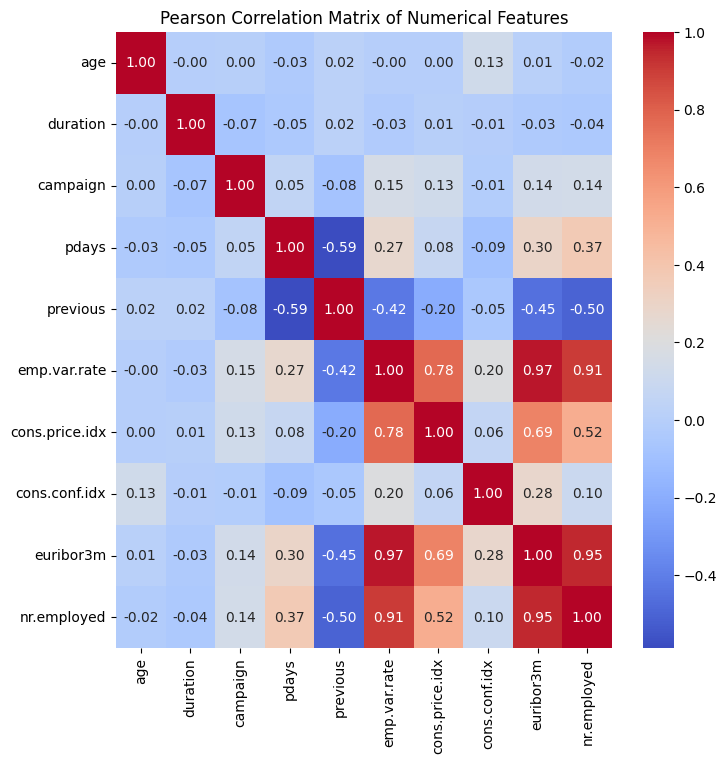

In [ ]:
corr_matrix = data[numerical_features].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()

Takeaways:

• Combining highly correlated features (euribor3m, emp.var.rate, nr.employed) into a single economic_index to avoid multicollinearity.

• We should keep independent age, duration, previous and campaign because they provide unique insights.

Scatter Plot

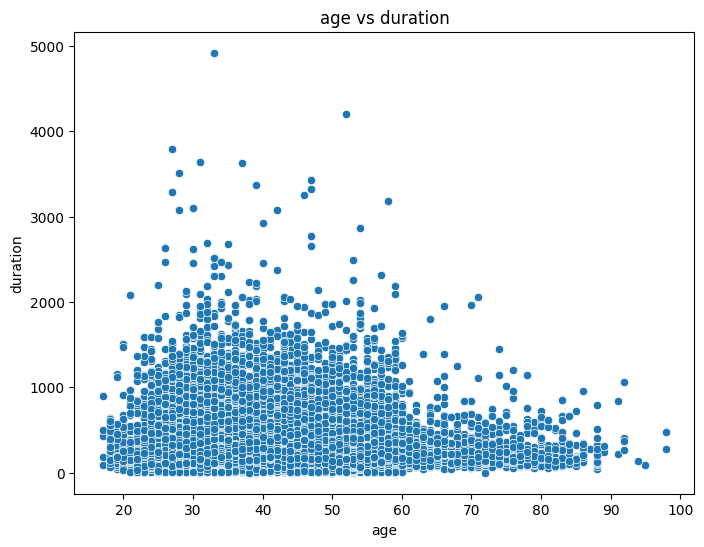

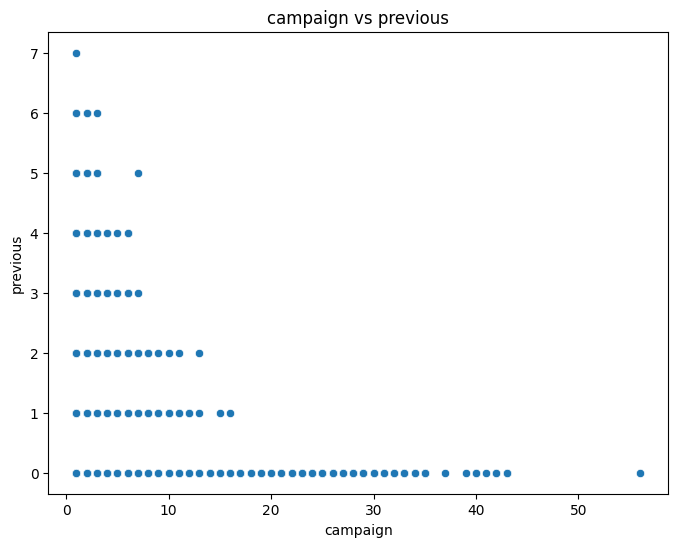

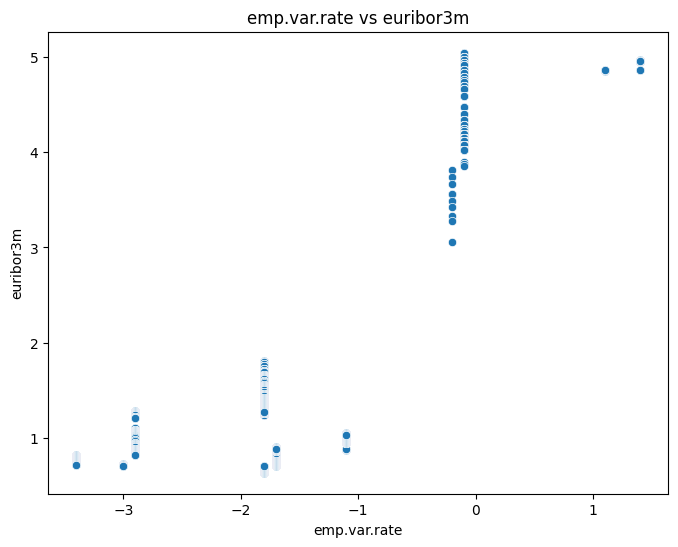

In [ ]:
def scatter_plot(x_feature, y_feature):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_feature, y=y_feature, data=data)
    plt.title(f'{x_feature} vs {y_feature}')
    plt.show()

scatter_plot('age', 'duration')
scatter_plot('campaign', 'previous')
scatter_plot('emp.var.rate', 'euribor3m')

Takeaways:

• Age vs Duration: Calls are mostly short, and older clients rarely have long calls.  
• Campaign vs Previous: Most clients had no previous contacts; high campaign values are rare.  
• Emp.var.rate vs Euribor3m: Strong linear link; we can merge them.  

Pairwise Relationships

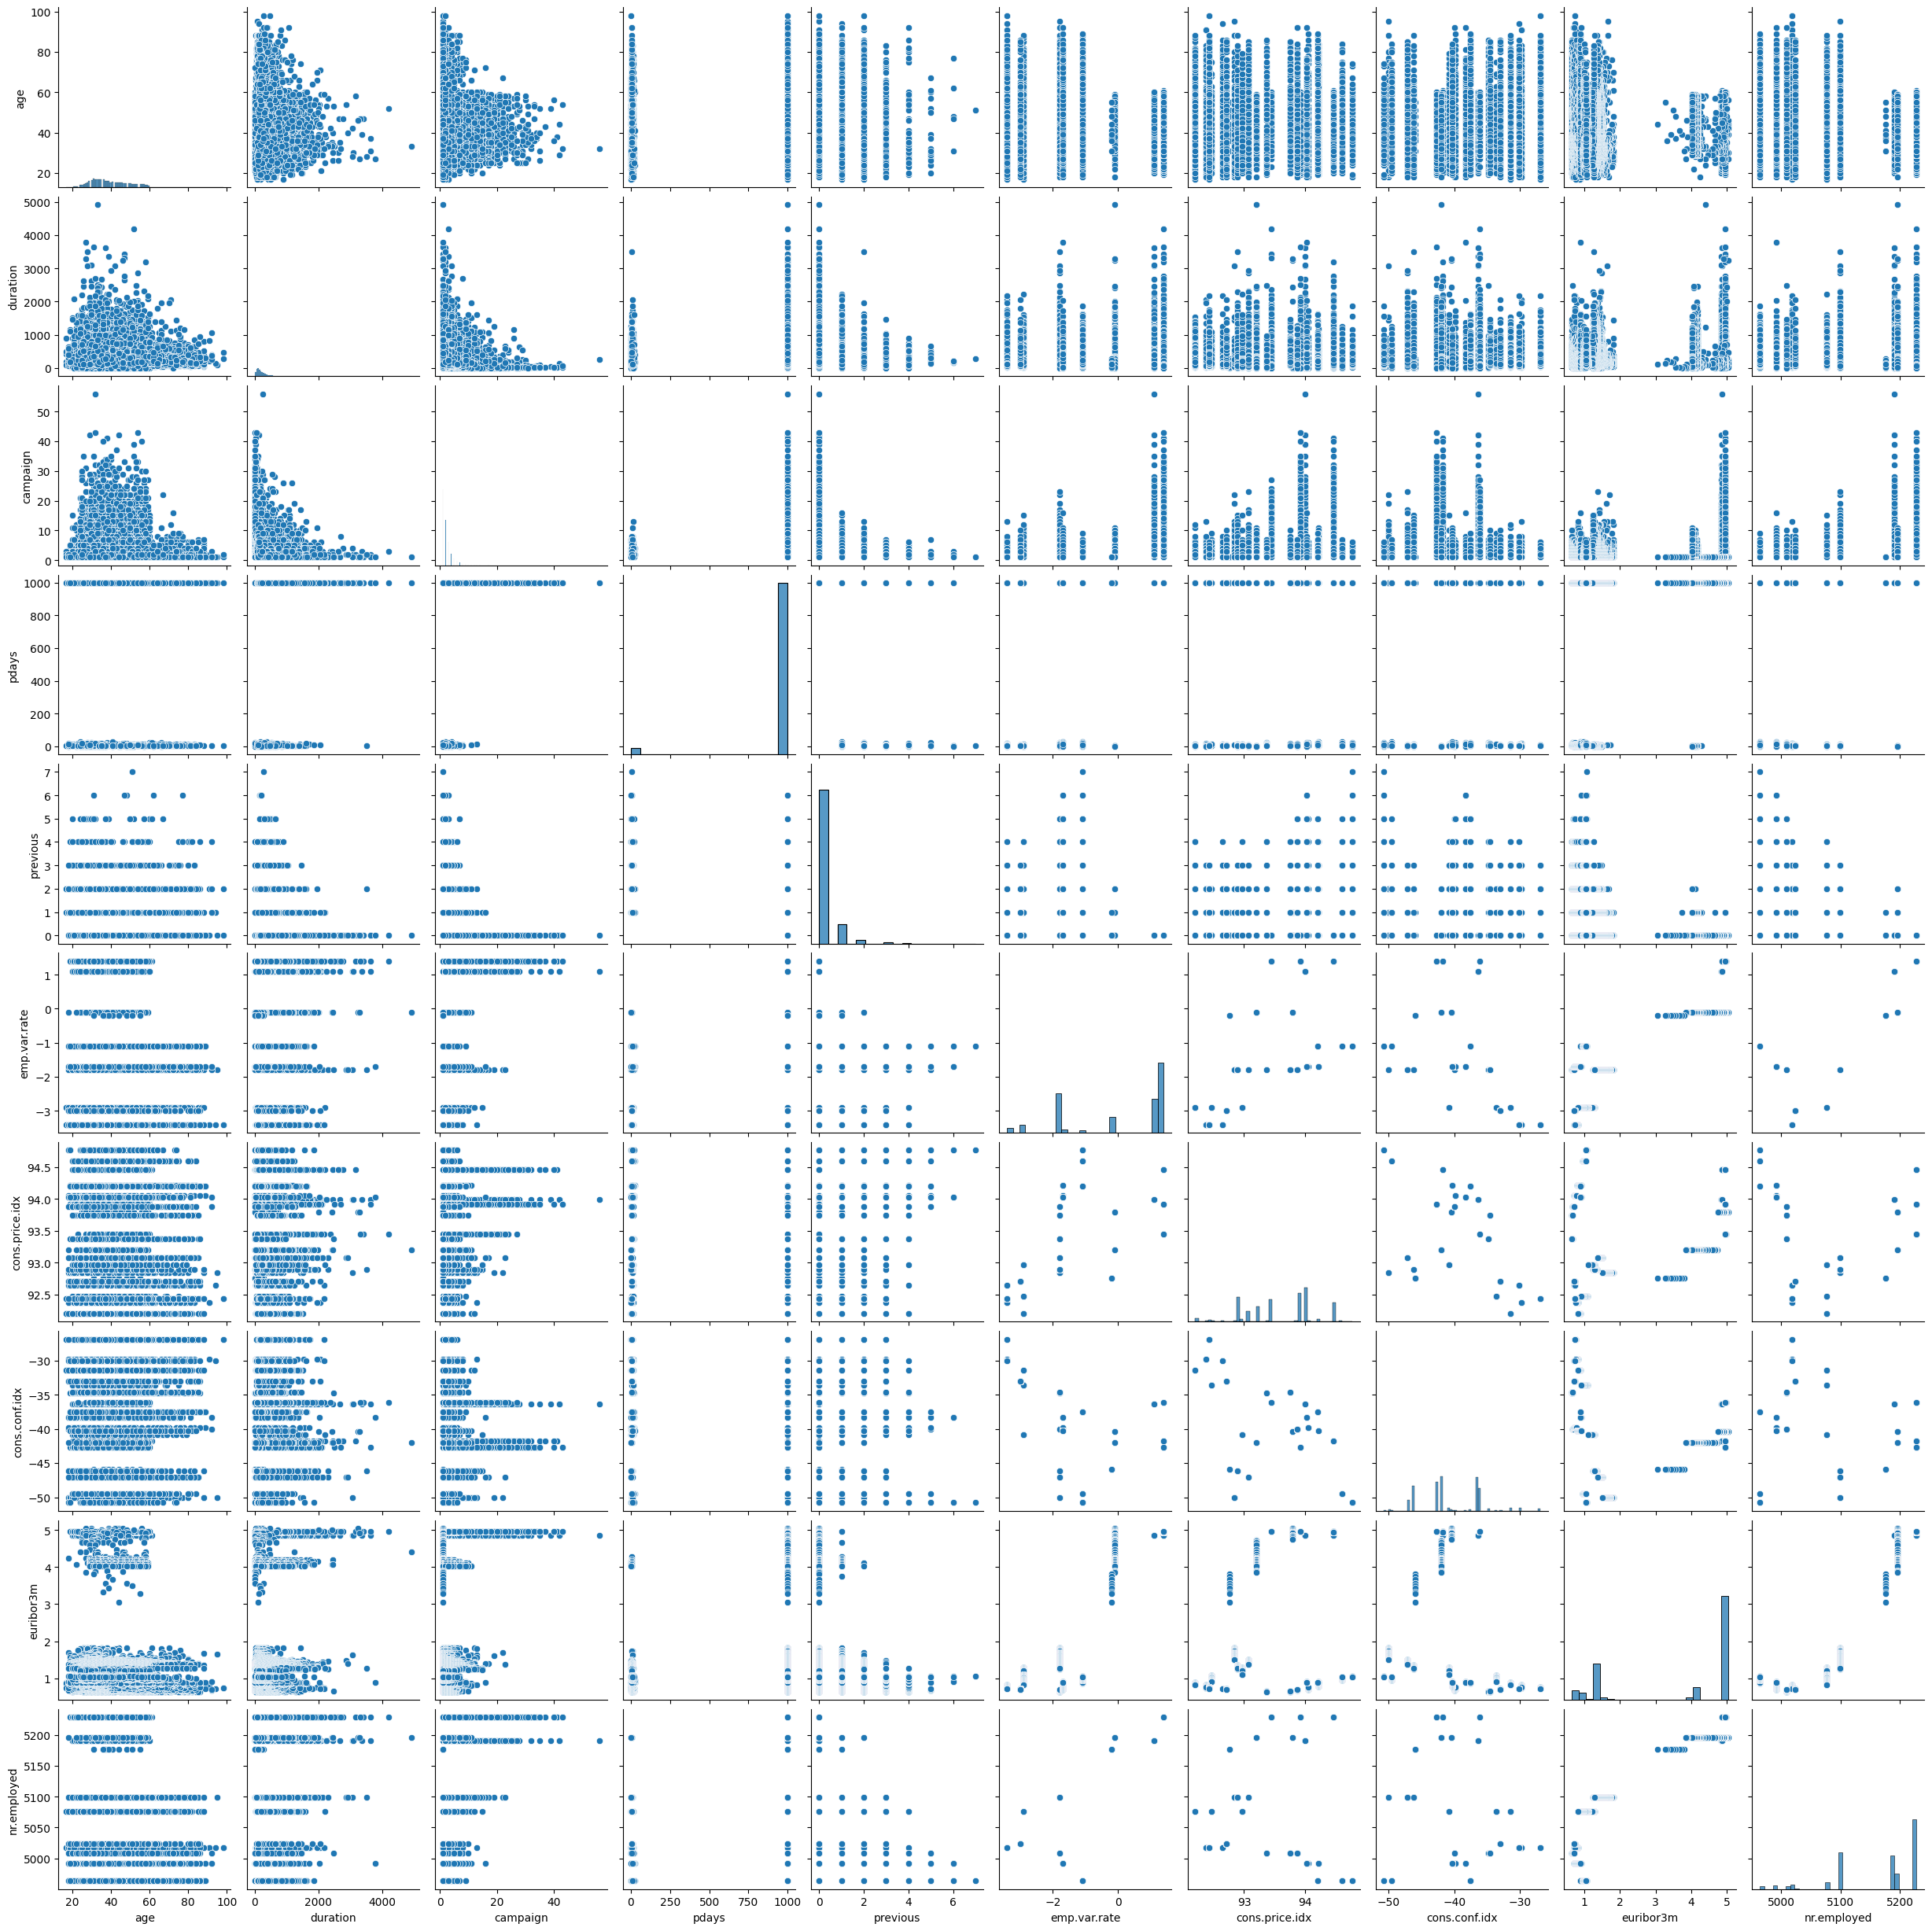

In [ ]:
sns.pairplot(data[numerical_features])
plt.show()

Let's introduce a new feature economic_index by merging euribor3m, emp.var.rate, and nr.employed to eliminate multicollinearity.


In [ ]:
economic_features = ['euribor3m', 'emp.var.rate', 'nr.employed']
scaler = StandardScaler()
economic_scaled = scaler.fit_transform(data[economic_features])
economic_scaled_data = pd.DataFrame(economic_scaled, columns=economic_features)
data[economic_features] = economic_scaled_data
data['economic_index'] = data[economic_features].mean(axis=1) # simple averaging

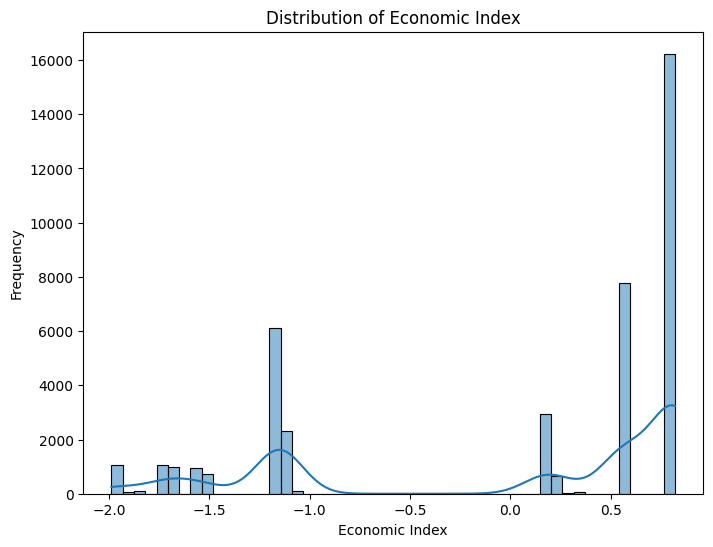

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['economic_index'], bins=50, kde=True)
plt.title('Distribution of Economic Index')
plt.xlabel('Economic Index')
plt.ylabel('Frequency')
plt.show()

Let's research relationship of economic index with target variable y.

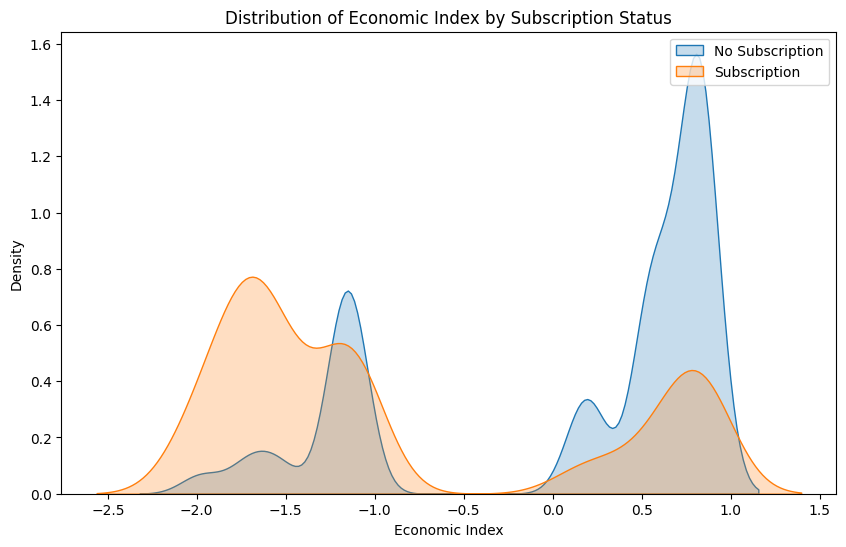

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['y'] == 'no']['economic_index'], label='No Subscription', fill=True)
sns.kdeplot(data=data[data['y'] == 'yes']['economic_index'], label='Subscription', fill=True)
plt.title('Distribution of Economic Index by Subscription Status')
plt.xlabel('Economic Index')
plt.ylabel('Density')
plt.legend()
plt.show()

Statistical Test

In [ ]:
economic_yes = data[data['y'] == 'yes']['economic_index']
economic_no = data[data['y'] == 'no']['economic_index']

t_stat, p_value = ttest_ind(economic_yes, economic_no, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -63.46263994469343, P-value: 0.0


Statistical testing indicates a significant difference in the economic index between subscribers and non-subscribers, with a P-value of 0.0 confirming high statistical significance.

Takeaway. Interesting, the data indicates that individuals facing challenging economic conditions (lower economic_index) are more inclined to subscribe. And that's extraordinary.

In [ ]:
data[['economic_index', 'euribor3m', 'emp.var.rate', 'nr.employed']].head()

,economic_index,euribor3m,emp.var.rate,nr.employed
0,0.564077,0.71246,0.648092,0.33168
1,0.564077,0.71246,0.648092,0.33168
2,0.564077,0.71246,0.648092,0.33168
3,0.564077,0.71246,0.648092,0.33168
4,0.564077,0.71246,0.648092,0.33168


We will remove redundant features and keep the new feature.

In [ ]:
data.drop(columns=economic_features, inplace=True)

Let's check how categorical features relate to the target variable 'y'.
We'll use bar plots to see if certain categories affect subscription rates.

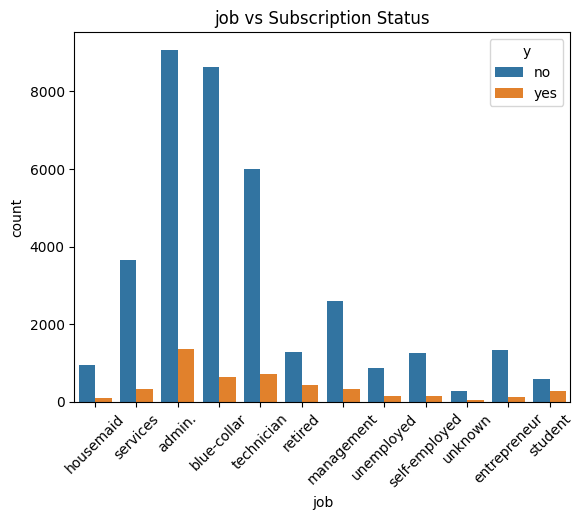

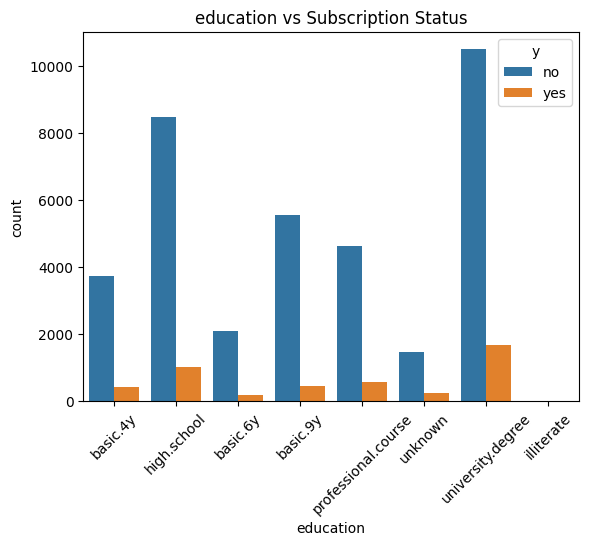

In [ ]:
def plot_categorical_vs_target(feature):
    sns.countplot(x=feature, hue='y', data=data)
    plt.title(f'{feature} vs Subscription Status')
    plt.xticks(rotation=45)
    plt.show()

plot_categorical_vs_target('job')
plot_categorical_vs_target('education')

Takeaway.

• Job vs Subscription: Admin, blue-collar, and technical workers say "yes" and "no" the most, so they’re key, but not easy to win over for subscriptions.  
• Education vs Subscription: Clients with university degrees subscribe more often, while those with basic education usually say "no."

Let's research how duration and campaign features relate to the target variable 'y'.

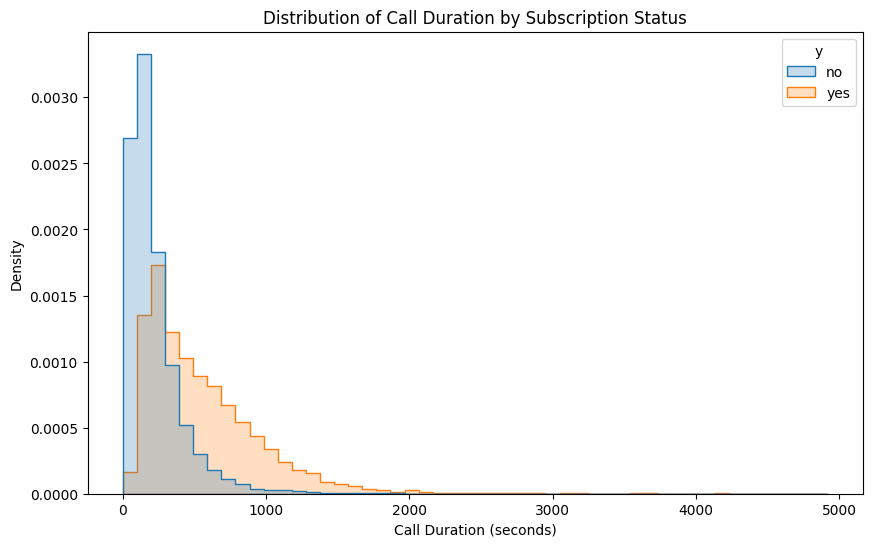

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', hue='y', bins=50, element='step', stat='density', common_norm=False)
plt.title('Distribution of Call Duration by Subscription Status')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Density')
plt.show()

Statistical Test

In [ ]:
duration_no = data[data['y'] == 'no']['duration']
duration_yes = data[data['y'] == 'yes']['duration']

t_stat, p_value = ttest_ind(duration_yes, duration_no, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value}")

T-statistic: 55.50, P-value: 0.0


The T-test indicates that the mean call duration is significantly longer for subscribers compared to non-subscribers, and the P-value of 0.0 means this difference is very significant.

Takeaway. Interestingly, longer call durations correlate with higher subscription rates, as interested clients tend to engage longer. **However**, since `duration` is known only after the call, it should not be used as a predictive feature to avoid data leakage.

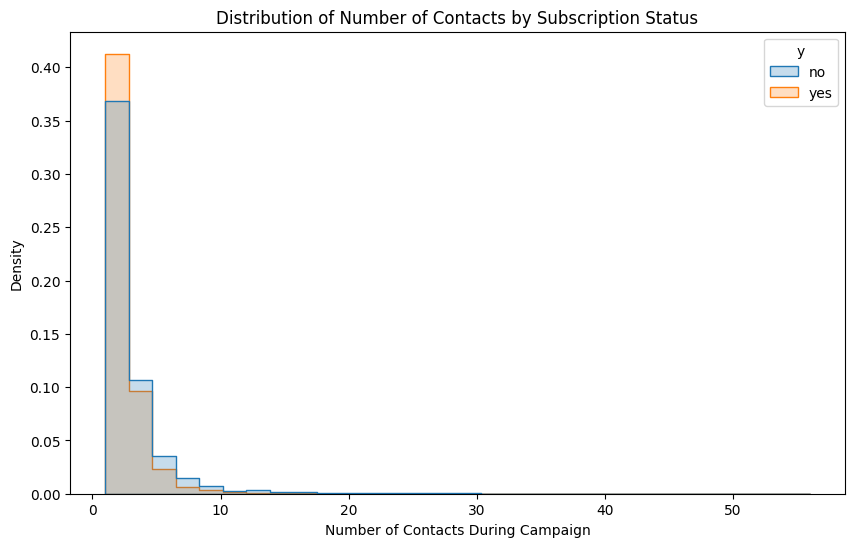

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='campaign', hue='y', bins=30, element='step', stat='density', common_norm=False)
plt.title('Distribution of Number of Contacts by Subscription Status')
plt.xlabel('Number of Contacts During Campaign')
plt.ylabel('Density')
plt.show()

Statistical Test

In [ ]:
campaign_no = data[data['y'] == 'no']['campaign']
campaign_yes = data[data['y'] == 'yes']['campaign']

t_stat, p_value = ttest_ind(campaign_yes, campaign_no, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.2e}")

T-statistic: -20.25, P-value: 4.10e-89


The T-test shows that the number of contacts (campaign) is lower for subscribers ("yes") than for non-subscribers ("no"), and the very low P-value confirms this difference is very significant.

Takeaway. A lower number of client contacts correlates with higher subscription rates, suggesting that targeted outreach is more effective.

# DP

# Imputation

Handling missing values labeled as "unknown" by imputing with the mode (most frequent category). This approach retains valuable information, as suggested by Scikit-learn documentation.


In [ ]:
columns_to_impute = ['job', 'marital', 'default', 'housing', 'loan', 'education']

data[columns_to_impute] = data[columns_to_impute].replace('unknown', np.nan)

imputer = SimpleImputer(strategy='most_frequent')

data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

print(data[columns_to_impute].isnull().sum())

job          0
marital      0
default      0
housing      0
loan         0
education    0
dtype: int64


# Outliers Handling

Let's return to outliers in campaign. Let's handle them with capping because this is an easy fix that keeps all data points while cutting down the impact of extreme values.








In [ ]:
campaign_cap = 10
data['campaign'] = data['campaign'].clip(upper=campaign_cap)

Let's double check.

In [ ]:
print(data['campaign'].max())

10


# Encoding and Standardization

We'll use one-hot encoding to convert categories into numerical values, with drop_first=True to prevent multicollinearity.

In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'day_of_week', 'poutcome']

data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

print("First few rows of the encoded DataFrame:")
data_encoded.head()

First few rows of the encoded DataFrame:


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,economic_index,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,-36.4,no,0.564077,False,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,93.994,-36.4,no,0.564077,False,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,93.994,-36.4,no,0.564077,False,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,93.994,-36.4,no,0.564077,False,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,93.994,-36.4,no,0.564077,False,...,True,False,False,False,True,False,False,False,True,False


We'll standardize numerical data for consistent scale. We'll not include duration feature because duration is known only after the call, it should not be used as a predictive feature to avoid data leakage.



In [ ]:
numerical_features = ['age', 'campaign', 'pdays', 'previous',
                       'cons.price.idx', 'cons.conf.idx', 'economic_index']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded[numerical_features])
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_features)
data_encoded[numerical_features] = data_scaled_df

print("\nFirst few rows of scaled numerical features:")
print(data_encoded[numerical_features].head())


First few rows of scaled numerical features:
        age  campaign     pdays  previous  cons.price.idx  cons.conf.idx  \
0  1.533034 -0.707673  0.195414 -0.349494        0.722722       0.886447   
1  1.628993 -0.707673  0.195414 -0.349494        0.722722       0.886447   
2 -0.290186 -0.707673  0.195414 -0.349494        0.722722       0.886447   
3 -0.002309 -0.707673  0.195414 -0.349494        0.722722       0.886447   
4  1.533034 -0.707673  0.195414 -0.349494        0.722722       0.886447   

   economic_index  
0        0.575418  
1        0.575418  
2        0.575418  
3        0.575418  
4        0.575418  


We'll separate features and target variable.


In [ ]:
X = data_encoded.drop(['y', 'duration'], axis=1)
y = data_encoded['y']

y = y.map({'no': 0, 'yes': 1})
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [ ]:
print('duration' in X.columns)

False



# DR

Applying PCA to calculate explained variance and understand the contribution of each component.


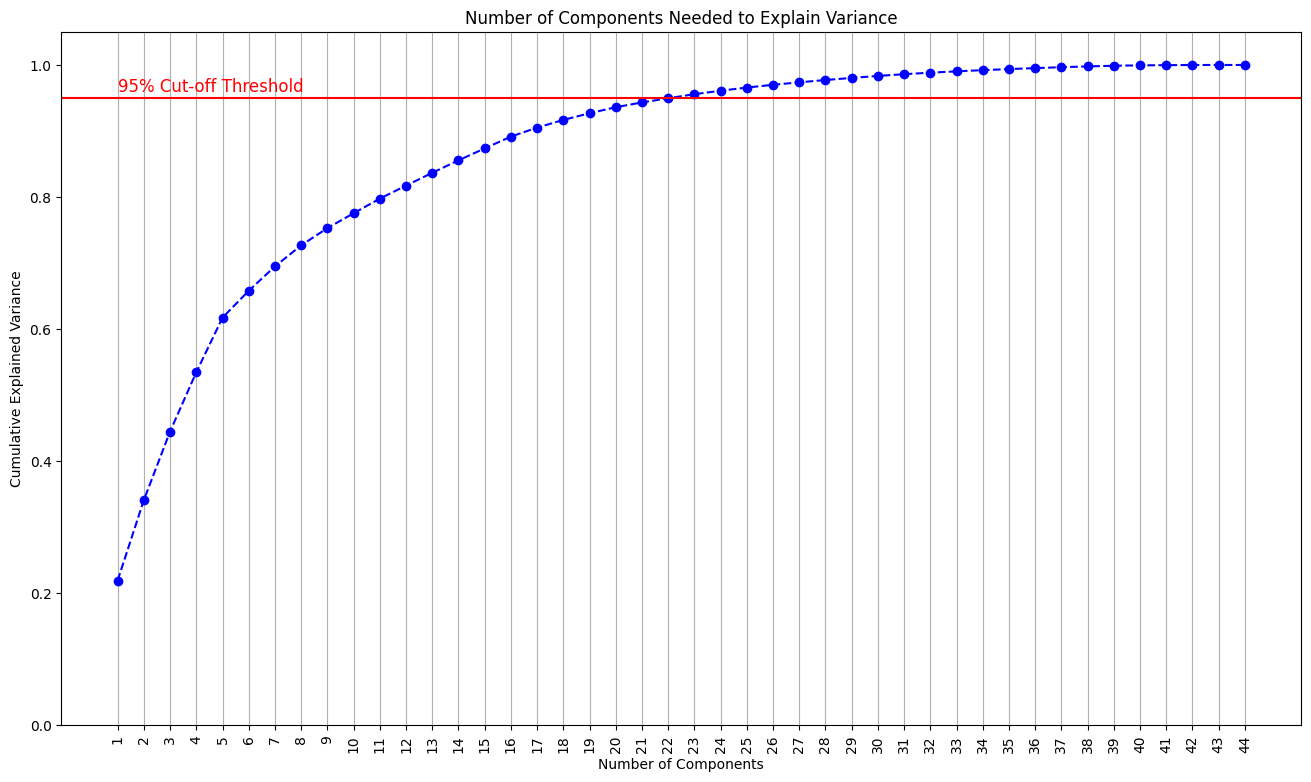

In [ ]:
pca = PCA()
pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

number_of_components = len(cumulative_variance)

fig, ax = plt.subplots(figsize=(16, 9))

x_ticks = np.arange(1, number_of_components + 1)

ax.plot(x_ticks, cumulative_variance, marker="o", linestyle="--", color="b")

ax.set_xlabel("Number of Components")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Number of Components Needed to Explain Variance")

ax.set_ylim(0.0, 1.05)

ax.axhline(y=0.95, color="r", linestyle="-")
ax.text(1, 0.96, "95% Cut-off Threshold", color="red", fontsize=12)

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation=90)

ax.grid(axis="x")

plt.show()

The cumulative explained variance shows that the 22 principal component explains 95% of the variance. However, to visualize the data in two dimensions, we need two components. We'll manually set n_components to 2.

In [ ]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
print('Explained variance by each component:')
print(explained_variance)

total_explained_variance = cumulative_variance[n_components - 1]
print(f'Total explained variance with {n_components} components: {total_explained_variance:.4f}')


Explained variance by each component:
[0.21887044 0.12197624]
Total explained variance with 2 components: 0.3408


The first component captures 21.89% of the variance. The first two components together explain 34.08% of the variance.





In [ ]:
pc1_loadings = pd.Series(pca.components_[0], index=X.columns)
print("First Principal Component Loadings:")
print(pc1_loadings.sort_values(ascending=False))

First Principal Component Loadings:
economic_index                   5.551671e-01
cons.price.idx                   4.397525e-01
pdays                            3.975505e-01
poutcome_nonexistent             1.648823e-01
campaign                         1.578531e-01
contact_telephone                1.494582e-01
cons.conf.idx                    9.973697e-02
month_jul                        5.857382e-02
month_jun                        5.229634e-02
marital_married                  2.855197e-02
job_blue-collar                  2.374166e-02
month_aug                        1.040850e-02
education_basic.9y               9.512221e-03
job_technician                   5.855148e-03
education_basic.6y               5.364137e-03
job_services                     5.214204e-03
day_of_week_wed                  4.284861e-03
job_housemaid                    2.940939e-03
education_professional.course    2.340772e-03
job_entrepreneur                 2.050301e-03
day_of_week_tue                  1.435709e-0

The first principal component is mainly influenced by economic factors and contact history.

Let's visualize PCA.


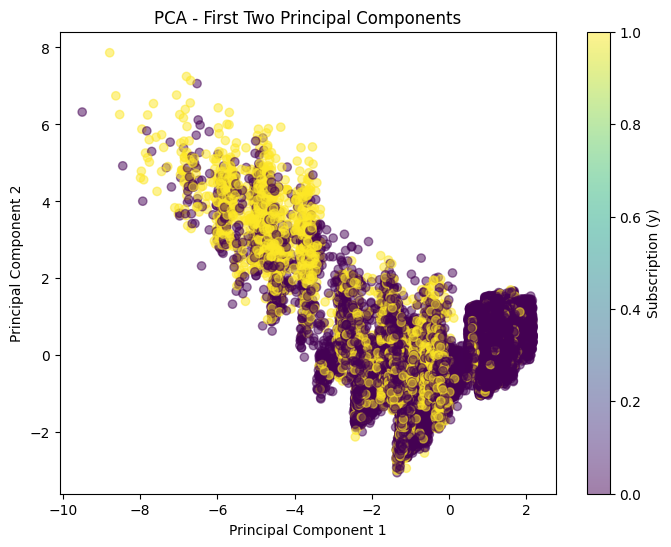

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Subscription (y)')
plt.show()

The variance redistribution due to the exclusion of duration highlights PCA's limitations for visualization in this complex dataset. While PCA captures linear patterns, it struggles with the non-linear relationships present here.

Let's try t-SNE with different perplexities. Let's visualize t-SNE. (Rerun of t-SNE is time consuming)

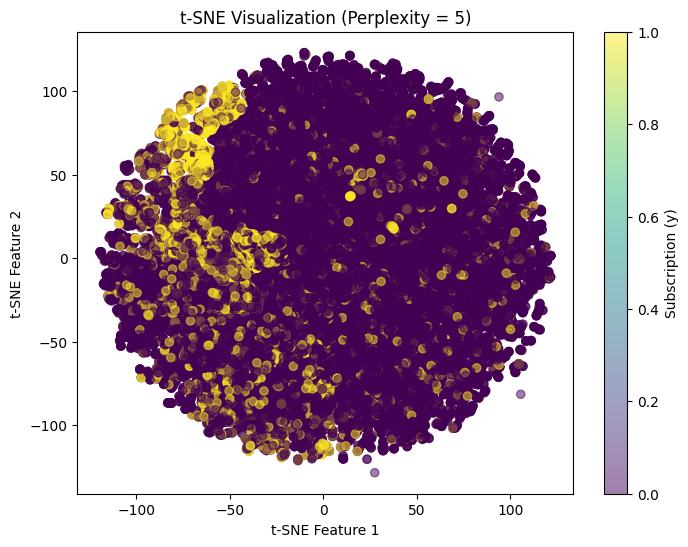

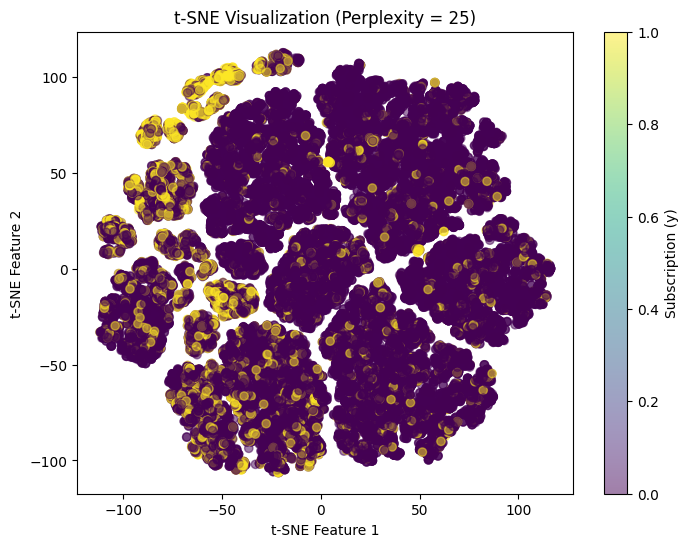

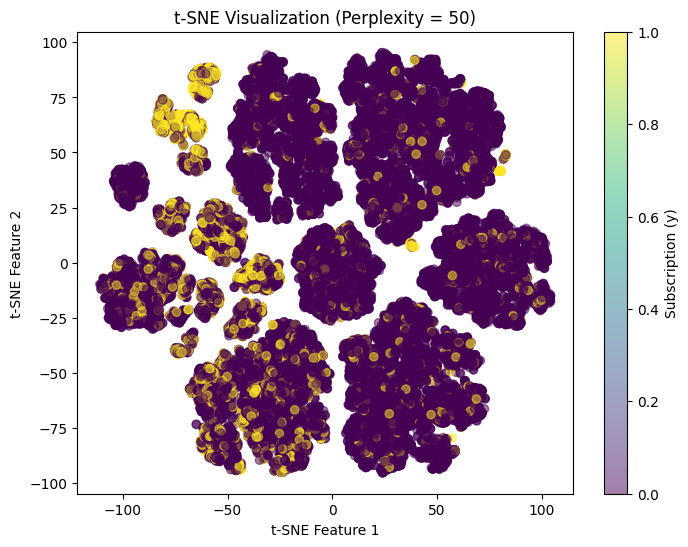

In [ ]:
perplexities = [5, 25, 50]

for perplexity in perplexities:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, max_iter=1000)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.title(f't-SNE Visualization (Perplexity = {perplexity})')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.colorbar(scatter, label='Subscription (y)')
    plt.show()

Takeaway. Interestingly, at a perplexity of 50, t-SNE reveals clustering among clients, we can observe distinct groups. However, overlapping of classes indicates the need for better feature engineering to improve class separation. (It's also interesting that with the duration feature at a perplexity of 50, I actually got a global structure — a spiral, as part of my research.)

Conclusion:

• Outliers and missing values are detected and handled to enhance data quality.

• New feature economic_index is introduced by combining highly correlated features to eliminate multicollinearity and it has become highly influential feature.

• Duration feature is excluded to avoid data leakage.

• Longer call durations are positively associated with subscription, emphasizing the importance of meaningful calls.

• Fewer, targeted client contacts are more effective than excessive spam.

• Job type and education level significantly impact subscription behavior, offering opportunities for tailored strategies.

• Dimensionality reduction (t-SNE) revealed clusters of data points.

Next Steps

• Model Development

• Marketing Strategies

• Further Analysis